In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

from src.config import read_train, seed_everything
from src.styles import set_styles

set_styles()
seed_everything(42)

In [2]:
df_train = read_train()

In [3]:
import re
def preprocess_text(text):
    # Normalize whitespace
    text = re.sub(r'\s+', ' ', text)  # Replace multiple whitespace with a single space
    text = text.strip()  # Remove leading and trailing whitespace

    # Preserve paragraphs
    paragraphs = text.split('\n')
    paragraphs = [p.strip() for p in paragraphs if p.strip()]  # Remove empty paragraphs

    return '\n\n'.join(paragraphs)  # Join paragraphs with double newlines

In [5]:
df_train = read_train()
X = df_train['full_text'].map(preprocess_text)
y = df_train['label']

vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5,
    stop_words="english",
)
X_tfidf = vectorizer.fit_transform(X)

In [6]:
pd.DataFrame(X_tfidf.toarray(), index=df_train.index)

,0,1,2,3,4,5,6,7,8,9,...,12875,12876,12877,12878,12879,12880,12881,12882,12883,12884
0,0.0,0.051781,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17302,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17303,0.0,0.000000,0.0,0.0,0.047642,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17304,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17305,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
for seed in range(5):
    kmeans = KMeans(
        n_clusters=7,
        init='k-means++', 
        # max_iter=100,
        n_init=10,
        random_state=seed,
    ).fit(X_tfidf)
    cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
    print(f"Number of elements assigned to each cluster: {cluster_sizes}")
print()

Number of elements assigned to each cluster: [3001 2088 3489 2025 1965 3091 1648]
Number of elements assigned to each cluster: [3091 3001 2088 2025 1648 3489 1965]
Number of elements assigned to each cluster: [3090 3489 2025 3001 1965 1649 2088]
Number of elements assigned to each cluster: [1965 2088 3001 3091 3489 2025 1648]
Number of elements assigned to each cluster: [3091 3001 2088 2025 1648 1965 3489]



C:\Users\Hawkins\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


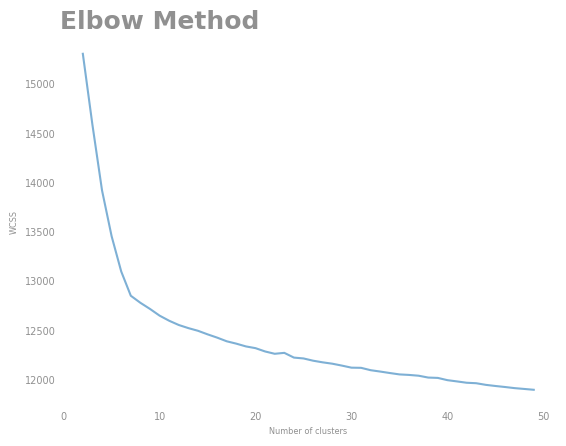

In [48]:
wcss = []
for i in range(2, 50):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_tfidf)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 50), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

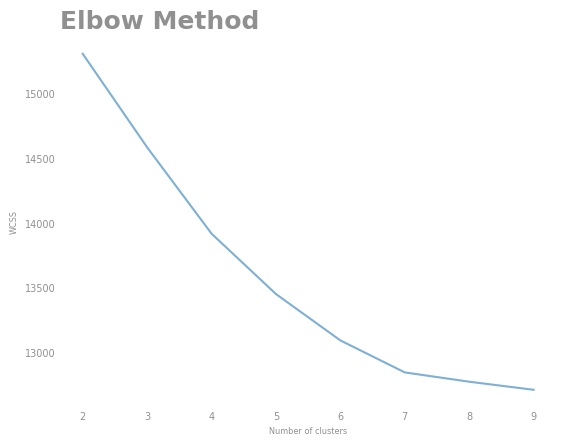

In [49]:
wcss = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_tfidf)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 10), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()